## 행사가격결정유예옵션
행사가격결정유예옵션(Deferred Strike Option)은 옵션의 만기 이전 특정 시점까지 행사가격이 결정되지 않고, 그 시점에서 기초 자산의 가격에 따라 행사가격이 결정되는 옵션입니다. 이 옵션은 시장 상황에 따라 행사가격을 유리하게 설정할 수 있는 유연성을 제공합니다.

[*********************100%%**********************]  1 of 1 completed


Deferred Strike Call Option Price: 8.67
Deferred Strike Put Option Price: 5.54


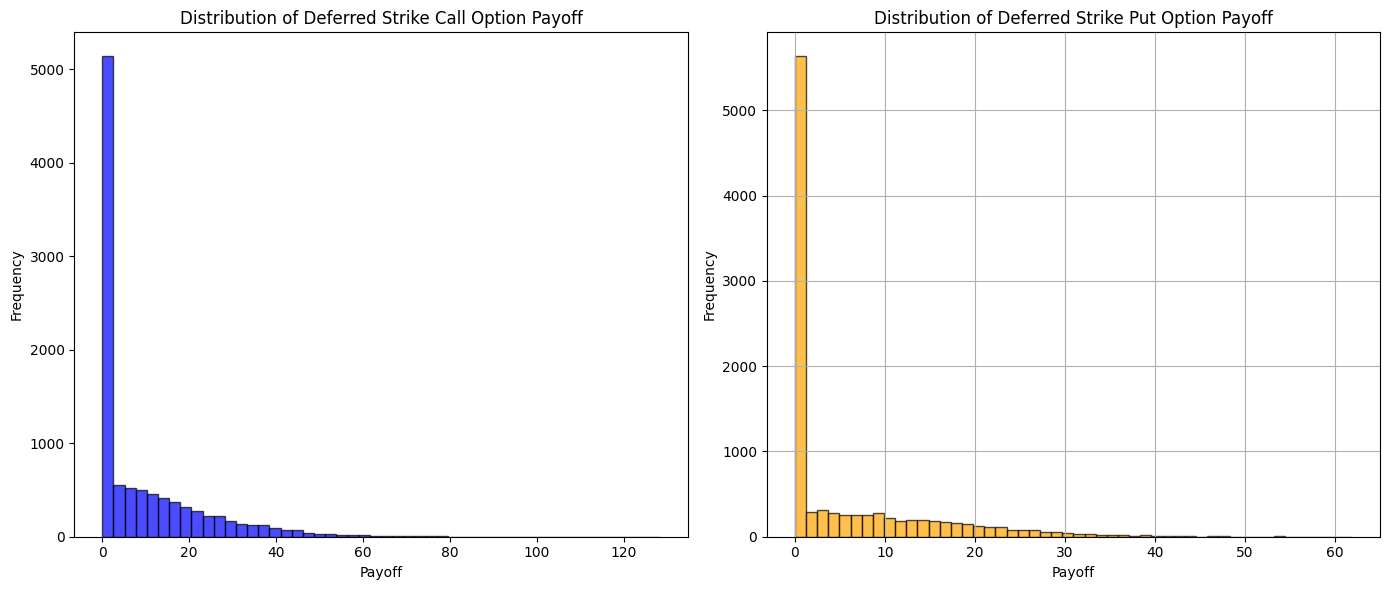

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def deferred_strike_option_payoff(paths, deferred_strike_date, option_type="call"):
    """
    행사가격결정유예옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    deferred_strike_date: 행사가격이 결정되는 날짜
    option_type: "call" 또는 "put"

    Returns:
    행사가격결정유예옵션의 페이오프 배열
    """
    strike_price = paths[:, deferred_strike_date]
    if option_type == "call":
        payoff = np.maximum(paths[:, -1] - strike_price, 0)
    elif option_type == "put":
        payoff = np.maximum(strike_price - paths[:, -1], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 행사가격결정유예옵션 파라미터 설정
S0 = closing_prices[0]  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
deferred_strike_date = 126  # 행사가격이 결정되는 날짜 (6개월)

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 행사가격결정유예옵션 페이오프 계산
deferred_call_payoffs = deferred_strike_option_payoff(paths, deferred_strike_date, option_type="call")
deferred_put_payoffs = deferred_strike_option_payoff(paths, deferred_strike_date, option_type="put")

# 행사가격결정유예옵션 가격 계산 (할인된 페이오프 평균)
deferred_call_price = np.exp(-r * T) * np.mean(deferred_call_payoffs)
deferred_put_price = np.exp(-r * T) * np.mean(deferred_put_payoffs)
print(f"Deferred Strike Call Option Price: {deferred_call_price:.2f}")
print(f"Deferred Strike Put Option Price: {deferred_put_price:.2f}")

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(deferred_call_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Deferred Strike Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(deferred_put_payoffs, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Deferred Strike Put Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.tight_layout()
plt.grid(True)
plt.show()
